 <span style="color:red; font-size:80px">House Price Prediction</span>

 <span style="color:red; font-size:50px">import labraries and dataset import</span>

In [10]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


df = pd.read_csv('data/Housing13.csv')



 <span style="color:red; font-size:50px">Expolatory Data Analysis</span>

In [11]:

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 152473 entries, 0 to 152472
Data columns (total 13 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   price             152473 non-null  int64 
 1   area              152473 non-null  int64 
 2   bedrooms          152473 non-null  int64 
 3   bathrooms         152473 non-null  int64 
 4   stories           152473 non-null  int64 
 5   mainroad          152473 non-null  object
 6   guestroom         152473 non-null  object
 7   basement          152473 non-null  object
 8   hotwaterheating   152473 non-null  object
 9   airconditioning   152473 non-null  object
 10  parking           152473 non-null  int64 
 11  prefarea          152473 non-null  object
 12  furnishingstatus  152473 non-null  object
dtypes: int64(6), object(7)
memory usage: 15.1+ MB


In [12]:
df['price'].min()

1750000

In [13]:
df['price'].max()

13300000

In [14]:
df['area'].min()

1650

In [15]:
df['area'].max()

16200

In [16]:
df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [17]:
df.describe()

,price,area,bedrooms,bathrooms,stories,parking
count,1.524730e+05,152473.000000,152473.000000,152473.000000,152473.00000,152473.000000
mean,5.238332e+06,5467.351059,3.037292,1.353210,1.92901,0.766975
std,1.986154e+06,2246.255508,0.732465,0.532035,0.95486,0.866550
min,1.750000e+06,1650.000000,1.000000,1.000000,1.00000,0.000000
25%,3.640000e+06,3745.000000,3.000000,1.000000,1.00000,0.000000
50%,4.900000e+06,5150.000000,3.000000,1.000000,2.00000,1.000000
75%,6.475000e+06,6600.000000,3.000000,2.000000,2.00000,1.000000
max,1.330000e+07,16200.000000,6.000000,4.000000,4.00000,3.000000


In [18]:
df.isnull().sum()

price               0
area                0
bedrooms            0
bathrooms           0
stories             0
mainroad            0
guestroom           0
basement            0
hotwaterheating     0
airconditioning     0
parking             0
prefarea            0
furnishingstatus    0
dtype: int64

In [19]:
df.shape

(152473, 13)

In [20]:
df['parking'].value_counts()

parking
0    76049
1    39007
2    34315
3     3102
Name: count, dtype: int64

In [21]:
df['area'].value_counts()

area
6000    10110
6600     3306
4500     3132
3000     3126
5500     3090
        ...  
2398      222
5495      222
3620      222
8960      214
9960      214
Name: count, Length: 284, dtype: int64

In [22]:
df.parking.unique()

array([2, 3, 0, 1], dtype=int64)

In [23]:
df.stories.unique()

array([3, 4, 2, 1], dtype=int64)

In [24]:
df.bathrooms.unique()

array([2, 4, 1, 3], dtype=int64)

In [25]:
df.prefarea.unique()

array(['yes', 'no'], dtype=object)

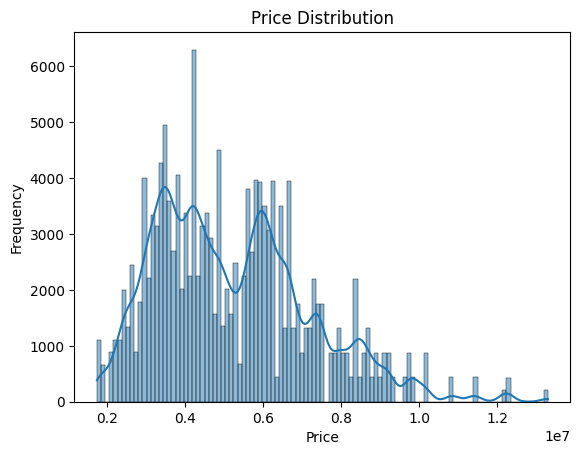

In [26]:
sns.histplot(df['price'], kde=True)
plt.title("Price Distribution")
plt.xlabel("Price")
plt.ylabel("Frequency")
plt.show()

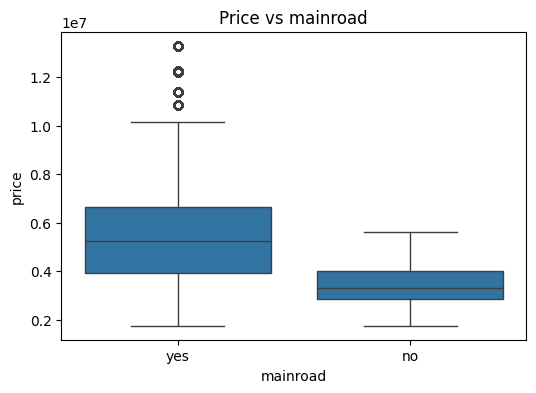

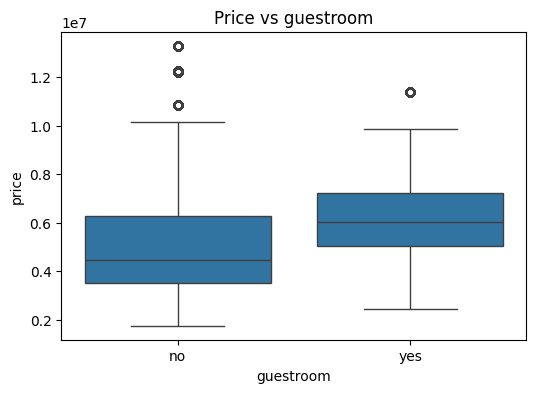

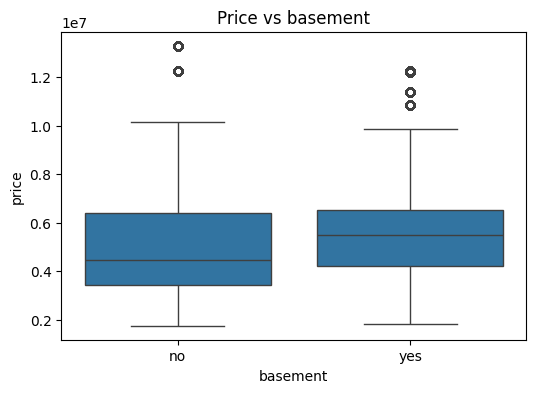

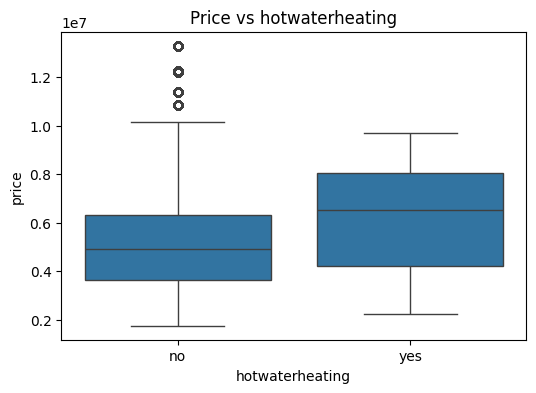

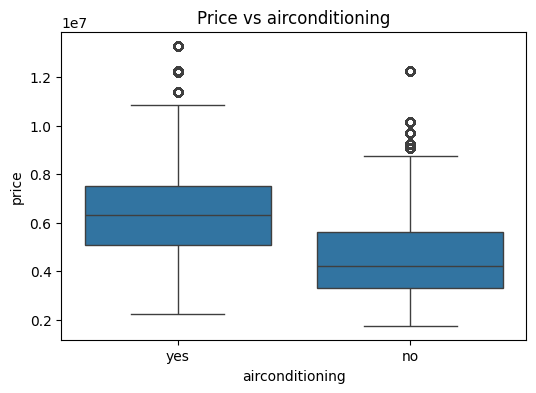

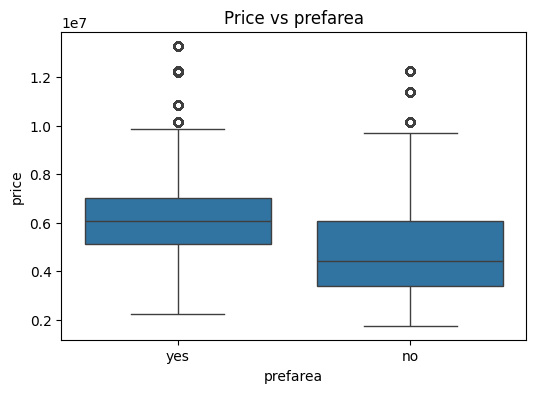

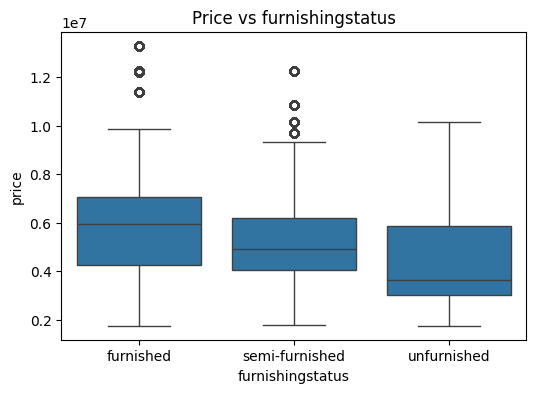

In [27]:
categorical_features = ['mainroad', 'guestroom', 'basement', 'hotwaterheating',
                        'airconditioning', 'prefarea', 'furnishingstatus']

for feature in categorical_features:
    plt.figure(figsize=(6, 4))
    sns.boxplot(x=feature, y='price', data=df)
    plt.title(f"Price vs {feature}")
    plt.show()

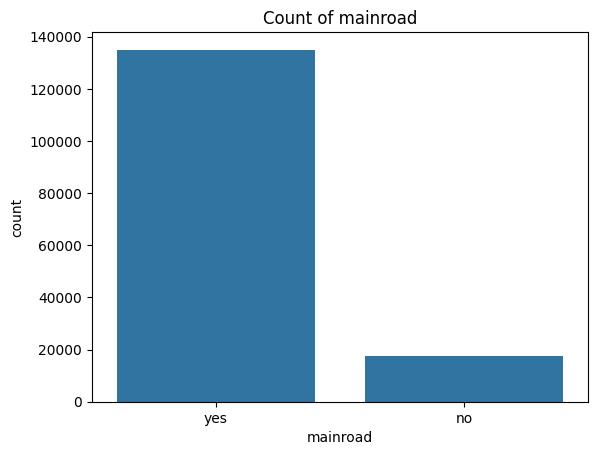

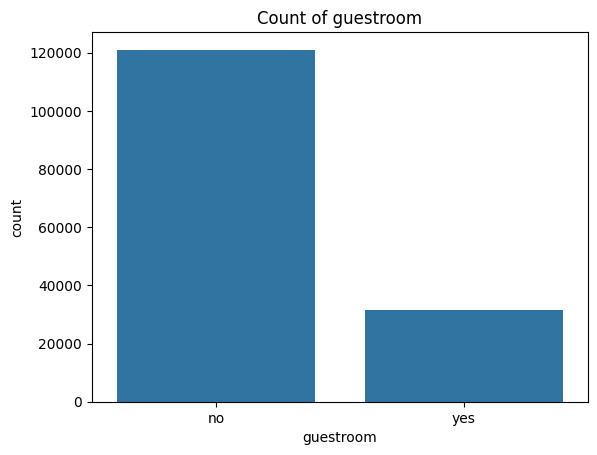

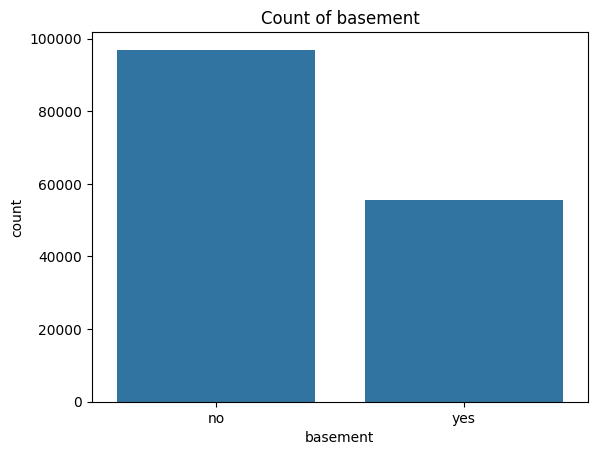

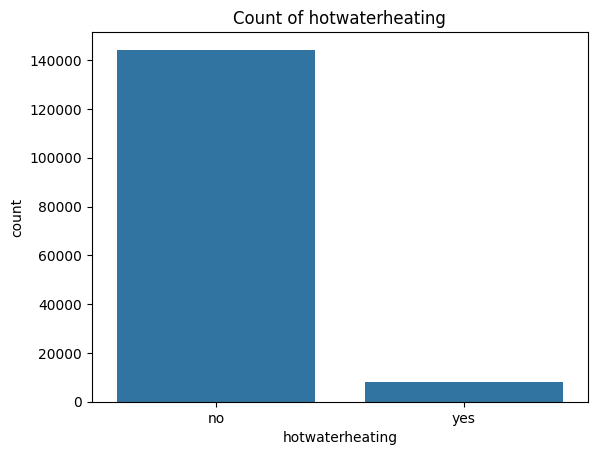

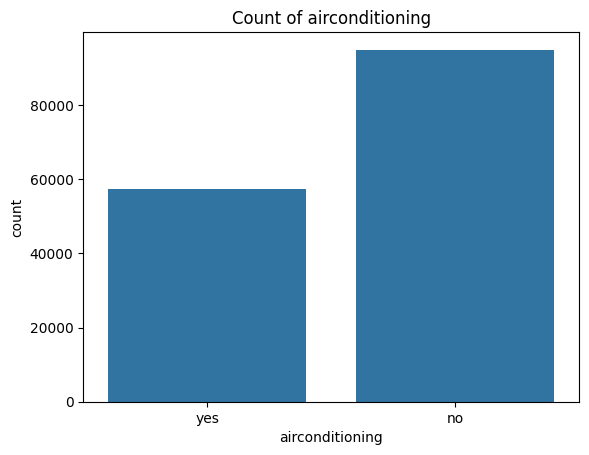

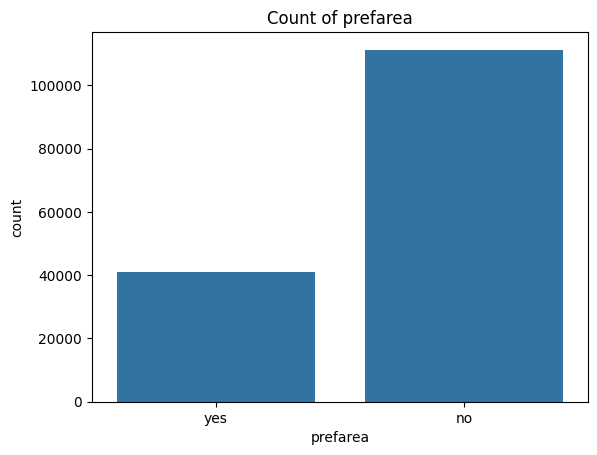

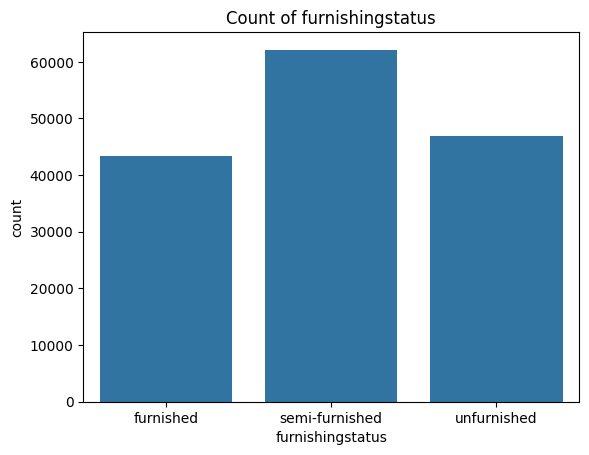

In [28]:
for feature in categorical_features:
    sns.countplot(x=feature, data=df)
    plt.title(f"Count of {feature}")
    plt.show()

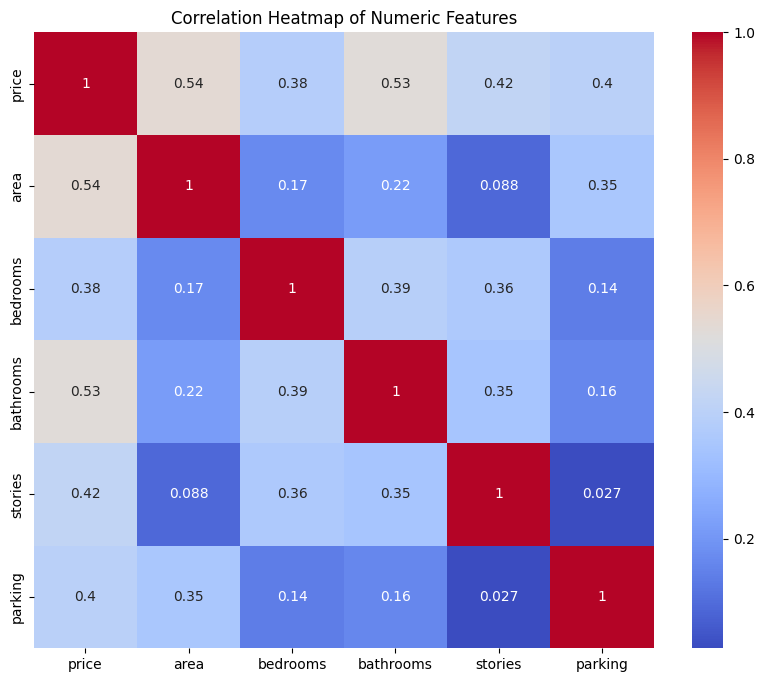

In [29]:
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap of Numeric Features")
plt.show()


# observation
## Price Correlation 
area → 0.54: Moderate positive correlation.

  Larger area → Higher price (makes sense!).

bathrooms → 0.52: Strong relationship.

More bathrooms → Higher price.

stories → 0.42: Also relevant.

More floors usually mean bigger or more luxurious homes.

bedrooms → 0.37: Mild correlation.

More bedrooms slightly increase price.

parking → 0.38: Small impact.

Extra parking adds some value.

 2. Weak Relationships:
stories and parking → 0.046: Very weak relationship.

How many stories a house has doesn’t relate much to parking.

3. Relationships Between Other Features:
bedrooms and stories → 0.41: More bedrooms often means more floors.

area and price → 0.54: The biggest factor in price is house siz

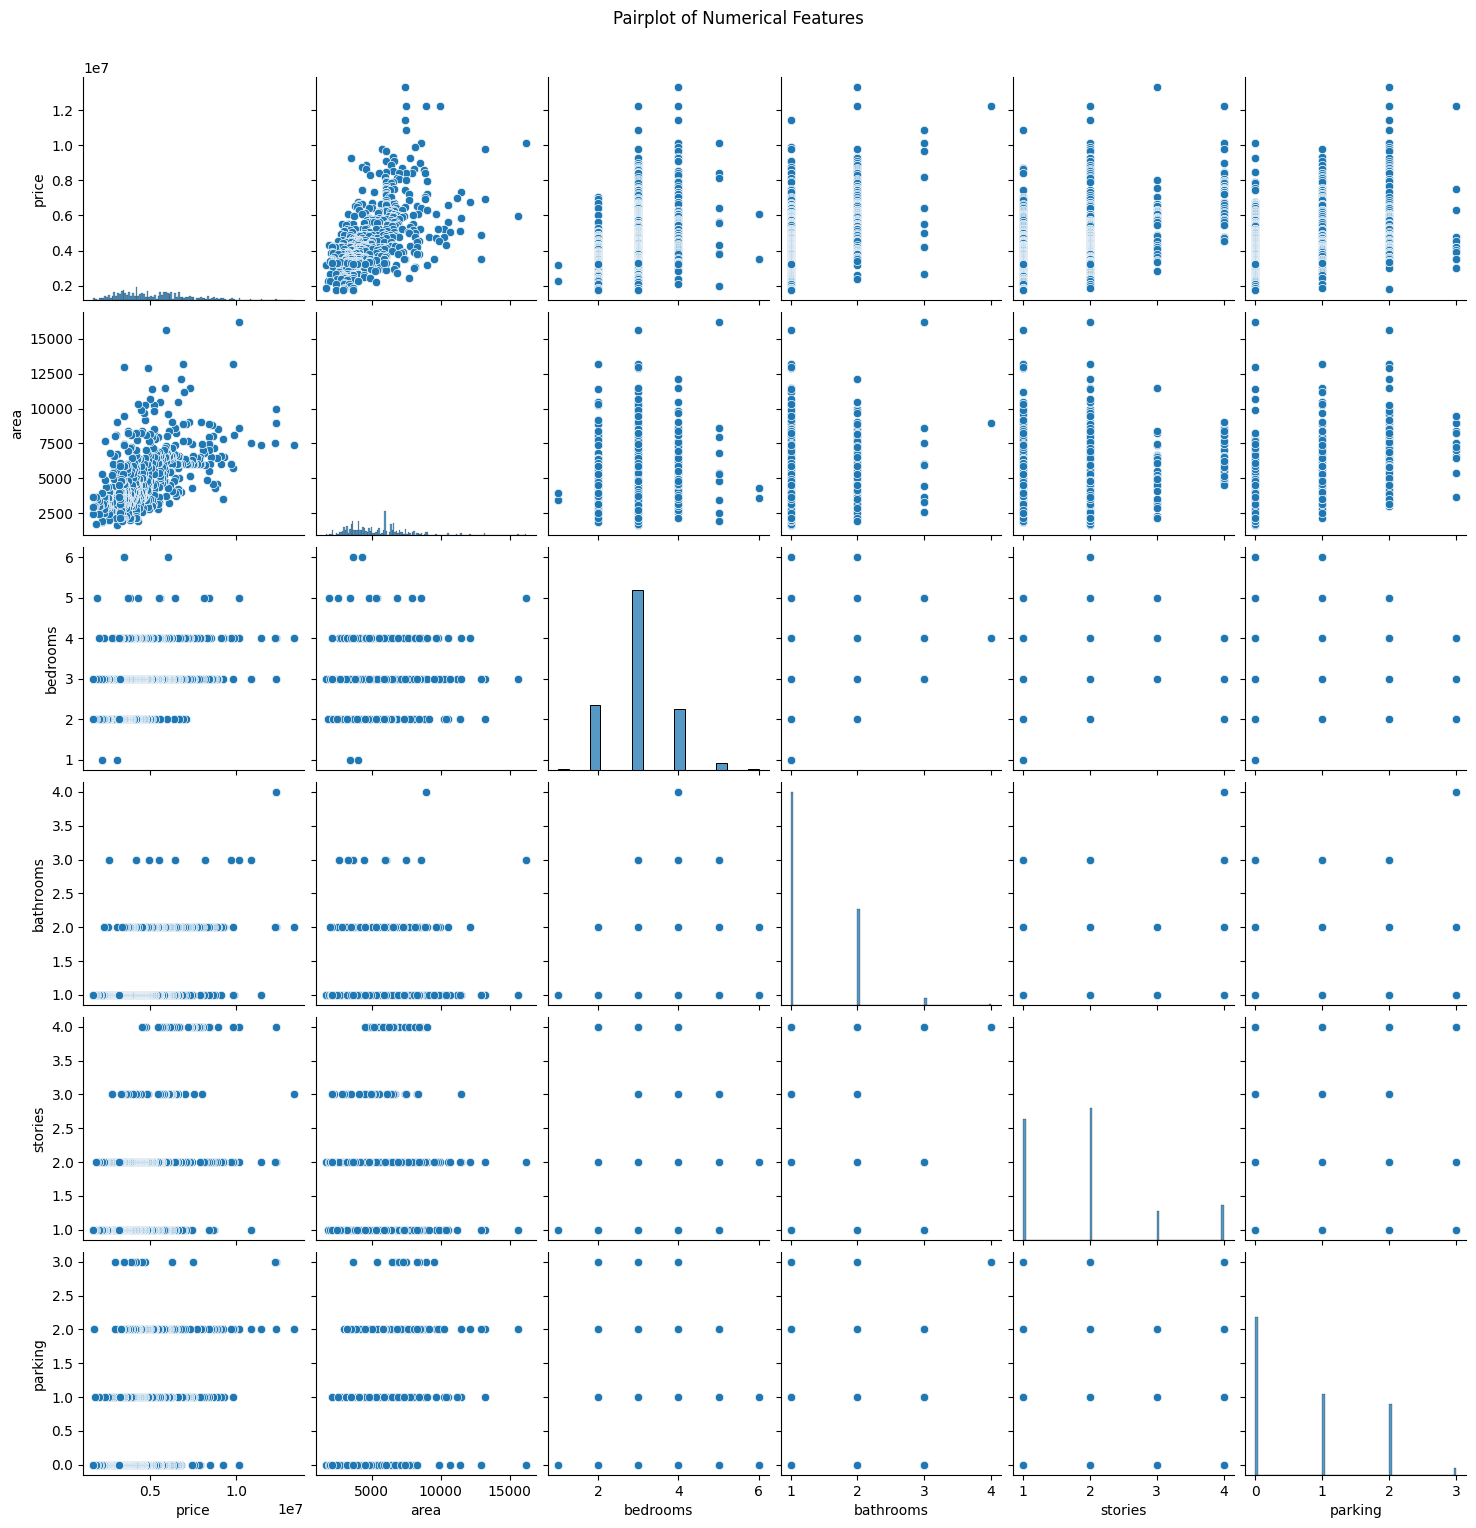

In [30]:
selected_features = ['price', 'area', 'bedrooms', 'bathrooms', 'stories', 'parking']
sns.pairplot(df[selected_features])
plt.suptitle("Pairplot of Numerical Features", y=1.02)
plt.show()

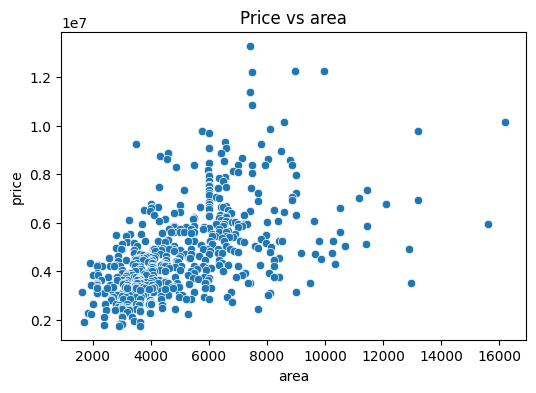

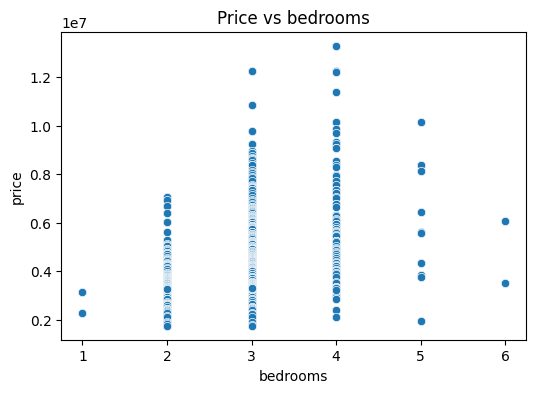

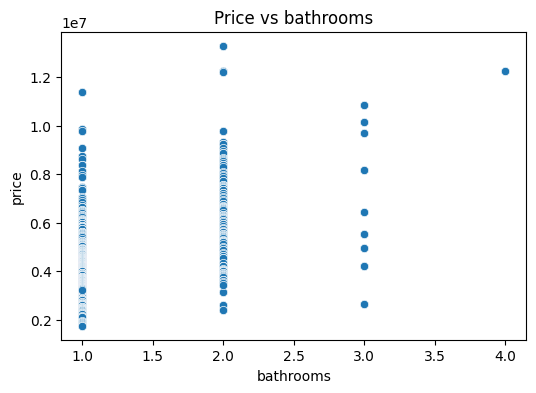

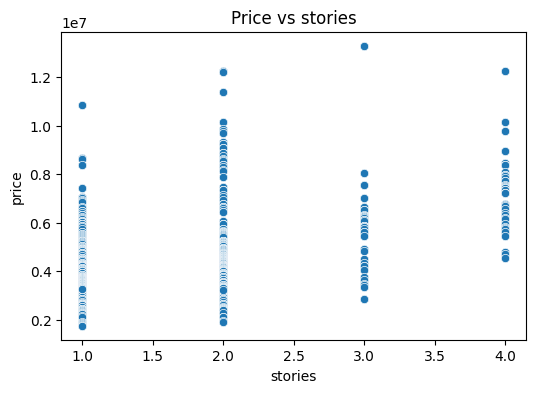

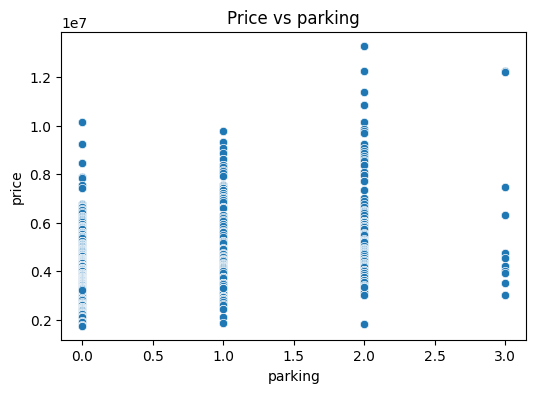

In [31]:
numerical_features = ['area', 'bedrooms', 'bathrooms', 'stories', 'parking']

for feature in numerical_features:
    plt.figure(figsize=(6, 4))
    sns.scatterplot(x=feature, y='price', data=df)
    plt.title(f"Price vs {feature}")
    plt.show()

<span style="color:red; font-size:50px">Data Wrangling</span>

In [32]:
df.duplicated().sum()

151929

In [33]:
df.drop_duplicates(inplace=True)

## show outliers

<Axes: ylabel='price'>

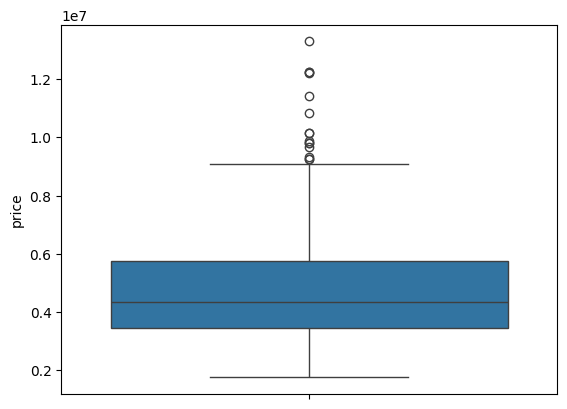

In [34]:
sns.boxplot(data=df,y=df['price'])

## remove outliers using interquartile range method IQR

In [35]:
Q1 = df['price'].quantile(0.25)
Q3 = df['price'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.0 * IQR
upper_bound = Q3 + 1.0 * IQR


df1 = df[(df['price'] >= lower_bound) & (df['price'] <= upper_bound)]


<Axes: ylabel='price'>

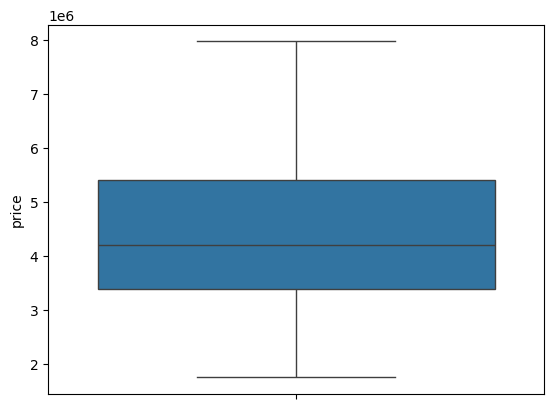

In [36]:
sns.boxplot(data=df1,y=df1['price'])

<Axes: ylabel='area'>

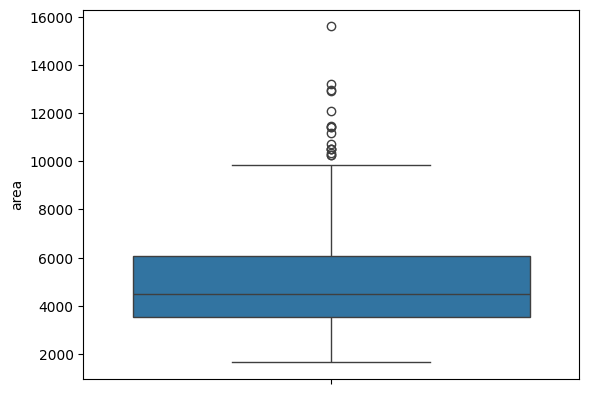

In [37]:
sns.boxplot(data=df1,y=df1['area'])

In [38]:
Q1 = df1['area'].quantile(0.25)
Q3 = df1['area'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.0 * IQR
upper_bound = Q3 + 1.0 * IQR

# Step 3: Filter the DataFrame to remove outliers
df2 = df1[(df1['area'] >= lower_bound) & (df1['area'] <= upper_bound)]

<Axes: ylabel='area'>

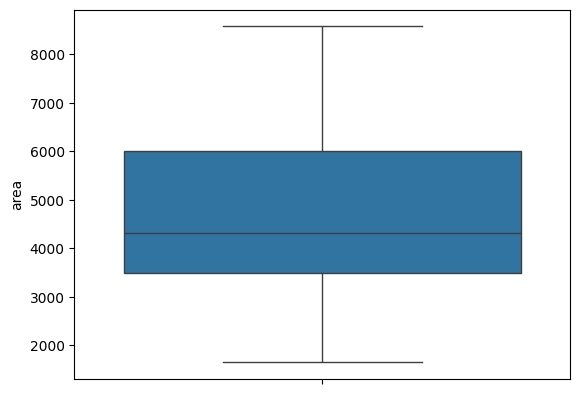

In [39]:
sns.boxplot(data=df2,y=df2['area'])

##  Use Label Encoding method for categorical Columns

In [40]:

df2 = df2.copy()


from sklearn.preprocessing import LabelEncoder

categorical_columns = ['mainroad', 'airconditioning', 'guestroom', 'basement', 'hotwaterheating','furnishingstatus','prefarea']

for col in categorical_columns:
    le = LabelEncoder()
    df2[col] = le.fit_transform(df2[col])





In [41]:
df2.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
38,7962500,6000,3,1,4,1,1,0,0,1,2,0,2
39,7910000,6000,4,2,4,1,0,0,0,1,1,0,1
40,7875000,6550,3,1,2,1,0,1,0,1,0,1,0
41,7840000,6360,3,2,4,1,0,0,0,1,0,1,0
42,7700000,6480,3,2,4,1,0,0,0,1,2,0,2


# Scalling using MinMax Scaller

In [42]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
df2_scalled=scaler.fit_transform(df2)

In [43]:
print(df2_scalled)

[[1.         0.62770563 0.4        ... 0.66666667 0.         1.        ]
 [0.9915493  0.62770563 0.6        ... 0.33333333 0.         0.5       ]
 [0.98591549 0.70707071 0.4        ... 0.         1.         0.        ]
 ...
 [0.00276056 0.10822511 0.4        ... 0.         0.         0.5       ]
 [0.         0.28427128 0.2        ... 0.         0.         1.        ]
 [0.         0.18181818 0.4        ... 0.         0.         0.        ]]


In [44]:
df3 = pd.DataFrame(
    df2_scalled, 
    columns=[
        'price', 'area', 'bedrooms', 'bathrooms', 'stories', 'mainroad', 
        'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 
        'parking',  
        'prefarea', 'furnishingstatus'  
    ]
)

In [45]:
df3.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,1.000000,0.627706,0.4,0.0,1.000000,1.0,1.0,0.0,0.0,1.0,0.666667,0.0,1.0
1,0.991549,0.627706,0.6,0.5,1.000000,1.0,0.0,0.0,0.0,1.0,0.333333,0.0,0.5
2,0.985915,0.707071,0.4,0.0,0.333333,1.0,0.0,1.0,0.0,1.0,0.000000,1.0,0.0
3,0.980282,0.679654,0.4,0.5,1.000000,1.0,0.0,0.0,0.0,1.0,0.000000,1.0,0.0
4,0.957746,0.696970,0.4,0.5,1.000000,1.0,0.0,0.0,0.0,1.0,0.666667,0.0,1.0


# Feature Engineering

# SFS Method (Sequential Feature Selection)

In [46]:


import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import SequentialFeatureSelector
from sklearn.preprocessing import OrdinalEncoder, StandardScaler
from sklearn.compose import ColumnTransformer


data = pd.read_csv("data/Housing13.csv")
X = data.drop(columns=["price"])
y = data["price"]
categorical_features = ['mainroad', 'airconditioning', 'guestroom', 'basement', 
                        'hotwaterheating', 'furnishingstatus', 'prefarea', 
                        'bedrooms', 'bathrooms', 'stories', 'parking']
numerical_features = ["area"]
preprocessor = ColumnTransformer(
    transformers=[
        ("num", StandardScaler(), numerical_features),
        ("cat", OrdinalEncoder(), categorical_features),
    ]
)
preprocessor.fit(X)
num_feature_names = numerical_features
cat_feature_names = [f"{col}_encoded" for col in categorical_features]
all_feature_names = num_feature_names + cat_feature_names
X_transformed = preprocessor.transform(X)
X_transformed_df = pd.DataFrame(X_transformed, columns=all_feature_names)
model = LinearRegression()
sfs = SequentialFeatureSelector(
    estimator=model, 
    n_features_to_select=8,
    direction="forward",
    scoring="r2",
    cv=5,
    n_jobs=-1
)
sfs.fit(X_transformed_df, y)
selected_features = X_transformed_df.columns[sfs.get_support()]
print("Selected Features:")
print(selected_features)


Selected Features:
Index(['area', 'airconditioning_encoded', 'basement_encoded',
       'hotwaterheating_encoded', 'prefarea_encoded', 'bathrooms_encoded',
       'stories_encoded', 'parking_encoded'],
      dtype='object')


In [47]:
df4 = pd.DataFrame(
    df3, 
    columns=[
        'price', 'area',  'bathrooms', 'stories', 'hotwaterheating', 
        'parking',  'airconditioning', 'basement','prefarea', 
    ]
)

In [48]:
df4.head()

,price,area,bathrooms,stories,hotwaterheating,parking,airconditioning,basement,prefarea
0,1.000000,0.627706,0.0,1.000000,0.0,0.666667,1.0,0.0,0.0
1,0.991549,0.627706,0.5,1.000000,0.0,0.333333,1.0,0.0,0.0
2,0.985915,0.707071,0.0,0.333333,0.0,0.000000,1.0,1.0,1.0
3,0.980282,0.679654,0.5,1.000000,0.0,0.000000,1.0,0.0,1.0
4,0.957746,0.696970,0.5,1.000000,0.0,0.666667,1.0,0.0,0.0


###  Train-Test Split, Linear Regression Model Training, and Performance Evaluation (R² and MSE)

In [49]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error,mean_absolute_error

X = df4.drop(['price'], axis=1)
y = df4['price']

x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train model
model = LinearRegression()
model.fit(x_train, y_train)

# Predict and evaluate
y_pred = model.predict(x_test)
print("R² Score:", r2_score(y_test, y_pred))
print("mean absulatue error",mean_absolute_error(y_test,y_pred))
print("Mean Squared Error:", mean_squared_error(y_test, y_pred))




R² Score: 0.7572358942261932
mean absulatue error 0.09384241266160337
Mean Squared Error: 0.014676103849396098


###  Train-Test Split, Random Forest Regressor Model Training, and Performance Evaluation (R² and MSE)

In [75]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error
model=RandomForestRegressor(n_estimators=50,random_state=42)

# Features and target
X = df4.drop(['price'], axis=1)
y = df4['price']


x_train, x_test, y_train ,y_test = train_test_split(X,y,test_size=0.2,random_state=42)
model.fit(x_train,y_train)
y_pred=model.predict(x_test)
print("score :", r2_score(y_test,y_pred))
print("mean absulatue error",mean_absolute_error(y_test,y_pred))
print("mean square error",mean_squared_error(y_test,y_pred))


score : 0.6670221744765208
mean absulatue error 0.11100506613756615
mean square error 0.02012989989336365


###  Train-Test Split, xgboost Model Training, and Performance Evaluation (R² and MSE)

In [76]:
import xgboost as xgb
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error
model=xgb.XGBRegressor(n_estimators=500,learning_rate=0.8,max_depth=500,random_state=42)

# Features and target
X = df4.drop(['price'], axis=1)
y = df4['price']


x_train, x_test, y_train ,y_test = train_test_split(X,y,test_size=0.2,random_state=42)
model.fit(x_train,y_train)
y_pred=model.predict(x_test)
print("score :", r2_score(y_test,y_pred))
print("mean absulatue error",mean_absolute_error(y_test,y_pred))
print("mean square error",mean_squared_error(y_test,y_pred))

score : 0.6052430945537584
mean absulatue error 0.1272542768666565
mean square error 0.02386470323167673


| Model                   | R² Score  | MAE (↓)        | MSE (↓)                |
| ----------------------- | --------- | -------------- | ---------------------- |
| **Linear Regression**   | **0.755** | **0.09**       | **0.01**               |
| Random Forest Regressor |   0.66    |  0.11          |    0.02                |
| XGBoost Regressor       |   0.60    |  0.12          |    0.02                |


## Linear Regression is the best-performing model based on R², MAE, and MSE.

In [50]:
import joblib
joblib.dump(model, 'House_price_prediction.pkl')
print("Model saveds successfully as 'House_price_prediction.pkl")

Model saveds successfully as 'House_price_prediction.pkl


## How Increasing Dataset Size Can Improve Model Accuracy
### Why Larger Datasets Help
Better Representation: A larger dataset typically captures more variations and patterns within the data, making the model more generalizable.
Reduced Overfitting: More data reduces the chance that the model will memorize noise or specific samples, leading to better performance on unseen data.
Improved Model Stability: Larger datasets help models learn more stable and reliable relationships.
Supports Complex Models: Big datasets enable the use of more complex models (e.g., deep learning, ensembles) without overfitting.

## test the model

In [57]:

area = 7420                
bathrooms = 2             
stories = 3
hotwaterheating = 'no'     
parking = 2
airconditioning = 'yes'    
basement = 'no'           
prefarea = 'yes'            

min_max = {
    'area': (1650, 16200),
    'bathrooms': (1, 4),
    'stories': (1, 4),
    'parking': (0, 3)
}


def normalize(value, min_val, max_val):
    return (value - min_val) / (max_val - min_val)

area_norm = normalize(area, *min_max['area'])
bathrooms_norm = normalize(bathrooms, *min_max['bathrooms'])
stories_norm = normalize(stories, *min_max['stories'])
parking_norm = normalize(parking, *min_max['parking'])


def yes_no_to_binary(val):
    return 1.0 if val.lower() == 'yes' else 0.0

hotwaterheating_bin = yes_no_to_binary(hotwaterheating)
airconditioning_bin = yes_no_to_binary(airconditioning)
basement_bin = yes_no_to_binary(basement)
prefarea_bin = yes_no_to_binary(prefarea)

loaded_model = joblib.load("House_price_prediction.pkl")
sample = [[
    area_norm, bathrooms_norm, stories_norm,
    hotwaterheating_bin, parking_norm, airconditioning_bin,
    basement_bin, prefarea_bin
]]
predicted_price = loaded_model.predict(sample)[0]
min_price = 1750000
max_price = 13300000
actual_price = predicted_price * (max_price - min_price) + min_price
print(f"Predicted House Price (actual):{actual_price:,.2f} RS")


Predicted House Price (actual):10,057,535.40 RS


c:\Users\m\anaconda3\envs\streamlit\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
